In [21]:
import geopandas as gpd
from matplotlib import pyplot as plt

In [8]:
from gerrychain import Graph, Partition, Election, MarkovChain

from gerrychain.updaters import Tally, cut_edges
from gerrychain.constraints import UpperBound, single_flip_contiguous, within_percent_of_ideal_population
from gerrychain.proposals import propose_random_flip
from gerrychain.accept import always_accept

In [4]:
graph = Graph.from_json("texas_2022_graph.json")
gdf = gpd.read_file("texas_2022.shp.zip")

In [35]:
list(gdf)

['CNTYKEY',
 'VTDKEY',
 'CNTYVTD',
 'CountyFIPS',
 'County',
 'total',
 'anglo',
 'nanglo',
 'asian',
 'black',
 'hisp',
 'bh',
 'vap',
 'anglovap',
 'nanglovap',
 'asianvap',
 'blackvap',
 'hispvap',
 'bhvap',
 'GOV2022R',
 'GOV22G',
 'GOV22D',
 'GOV22L',
 'GOV22WI',
 'LTG22D',
 'LTG22R',
 'LTG22L',
 'ATG22L',
 'ATG22D',
 'ATG22R',
 'enacted_cd',
 'geometry']

In [36]:
election = Election("GOV22", {"Dem": "GOV22D", "Rep": "GOV2022R"})

initial_partition = Partition(
    graph,
    assignment="enacted_cd",
    updaters={
        "cut_edges": cut_edges,
        "population": Tally("total", alias="population"),
        "GOV22": election
    }
)

In [37]:
ideal_population = sum(initial_partition["population"].values()) / len(initial_partition)
pop_constraint = within_percent_of_ideal_population(initial_partition, 0.05)

compactness_bound = UpperBound(
    lambda p: len(p["cut_edges"]),
    5*len(initial_partition["cut_edges"])
)

In [38]:
chain = MarkovChain(
    proposal=propose_random_flip,
    constraints=[single_flip_contiguous, pop_constraint, compactness_bound],
    accept=always_accept,
    initial_state=initial_partition,
    total_steps=100000
)

Election Results for GOV22
5:
  Dem: 0.3469
  Rep: 0.6531
18:
  Dem: 0.2241
  Rep: 0.7759
16:
  Dem: 0.3442
  Rep: 0.6558
26:
  Dem: 0.3516
  Rep: 0.6484
12:
  Dem: 0.2429
  Rep: 0.7571
27:
  Dem: 0.527
  Rep: 0.473
9:
  Dem: 0.3763
  Rep: 0.6237
20:
  Dem: 0.3825
  Rep: 0.6175
30:
  Dem: 0.3772
  Rep: 0.6228
10:
  Dem: 0.2538
  Rep: 0.7462
19:
  Dem: 0.6714
  Rep: 0.3286
34:
  Dem: 0.7389
  Rep: 0.2611
22:
  Dem: 0.4475
  Rep: 0.5525
0:
  Dem: 0.2196
  Rep: 0.7804
3:
  Dem: 0.3354
  Rep: 0.6646
13:
  Dem: 0.3256
  Rep: 0.6744
21:
  Dem: 0.3968
  Rep: 0.6032
8:
  Dem: 0.7664
  Rep: 0.2336
14:
  Dem: 0.4691
  Rep: 0.5309
24:
  Dem: 0.3125
  Rep: 0.6875
33:
  Dem: 0.5672
  Rep: 0.4328
35:
  Dem: 0.3163
  Rep: 0.6837
2:
  Dem: 0.4003
  Rep: 0.5997
31:
  Dem: 0.6508
  Rep: 0.3492
25:
  Dem: 0.3792
  Rep: 0.6208
23:
  Dem: 0.4161
  Rep: 0.5839
29:
  Dem: 0.7768
  Rep: 0.2232
4:
  Dem: 0.3584
  Rep: 0.6416
32:
  Dem: 0.7389
  Rep: 0.2611
15:
  Dem: 0.6473
  Rep: 0.3527
6:
  Dem: 0.643
  Rep:

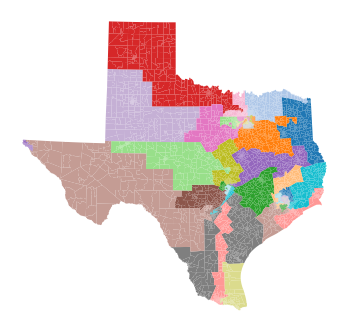

Election Results for GOV22
5:
  Dem: 0.3611
  Rep: 0.6389
18:
  Dem: 0.2264
  Rep: 0.7736
16:
  Dem: 0.3416
  Rep: 0.6584
26:
  Dem: 0.3447
  Rep: 0.6553
12:
  Dem: 0.2434
  Rep: 0.7566
27:
  Dem: 0.5533
  Rep: 0.4467
9:
  Dem: 0.4369
  Rep: 0.5631
20:
  Dem: 0.4092
  Rep: 0.5908
30:
  Dem: 0.3754
  Rep: 0.6246
10:
  Dem: 0.2349
  Rep: 0.7651
19:
  Dem: 0.6399
  Rep: 0.3601
34:
  Dem: 0.6823
  Rep: 0.3177
22:
  Dem: 0.4462
  Rep: 0.5538
0:
  Dem: 0.2231
  Rep: 0.7769
3:
  Dem: 0.3509
  Rep: 0.6491
13:
  Dem: 0.3347
  Rep: 0.6653
21:
  Dem: 0.4169
  Rep: 0.5831
8:
  Dem: 0.7235
  Rep: 0.2765
14:
  Dem: 0.4662
  Rep: 0.5338
24:
  Dem: 0.3196
  Rep: 0.6804
33:
  Dem: 0.555
  Rep: 0.445
35:
  Dem: 0.312
  Rep: 0.688
2:
  Dem: 0.4034
  Rep: 0.5966
31:
  Dem: 0.6108
  Rep: 0.3892
25:
  Dem: 0.3705
  Rep: 0.6295
23:
  Dem: 0.4338
  Rep: 0.5662
29:
  Dem: 0.7602
  Rep: 0.2398
4:
  Dem: 0.3418
  Rep: 0.6582
32:
  Dem: 0.6672
  Rep: 0.3328
15:
  Dem: 0.6493
  Rep: 0.3507
6:
  Dem: 0.5779
  Rep: 

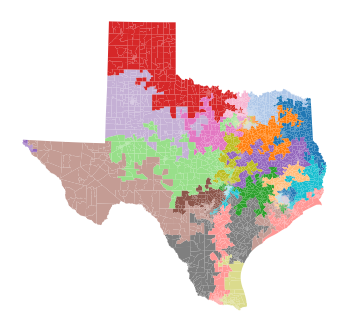

In [ ]:
for e,p in enumerate(chain):
    if e % 10000 == 0:
        p.plot(gdf, cmap='tab20', figsize=(6,6))
        print(p['GOV22'])
        plt.axis('off')
        plt.show()
    